<a href="https://colab.research.google.com/github/oariasz/Estratek_Dev/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtención de Datos

In [1]:
# Librerías pricipales
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Cargar el archivo housing.csv
df = pd.read_csv("housing.csv")

In [3]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Información general
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.shape

(20640, 10)

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

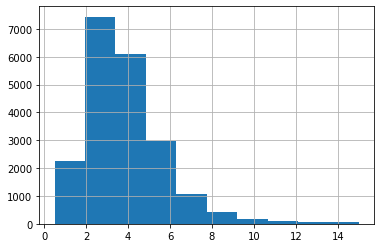

In [8]:
# Graficar el promedio de los ingresos
df['median_income'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f215e6c2e90>,
      dtype=object)

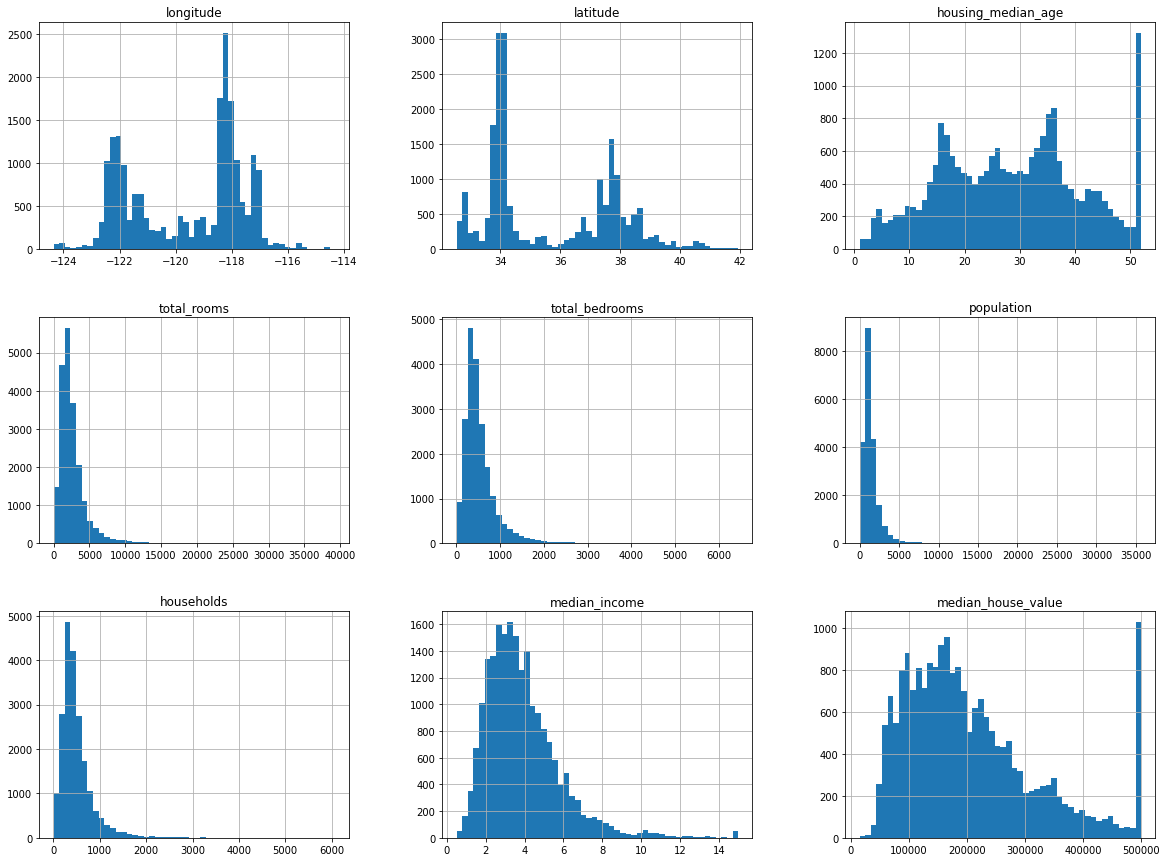

In [9]:
# Graficar todas las variables numéricas
df.hist(bins=50, figsize=(20,15))

##Mapa de Casas (Sin Folium)

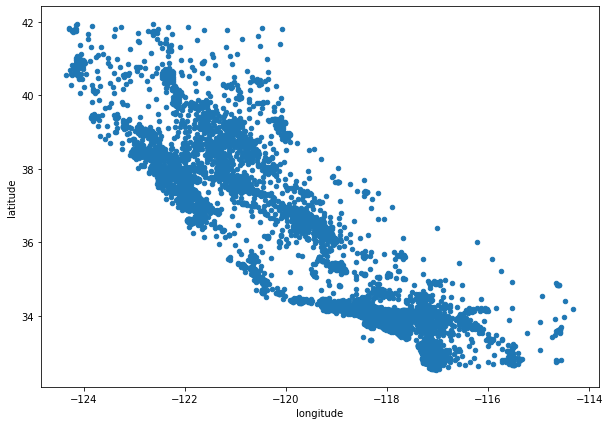

In [10]:
# Se despliega una gráfica de dispersión con la longintud en X y la latitud en Y
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,7))

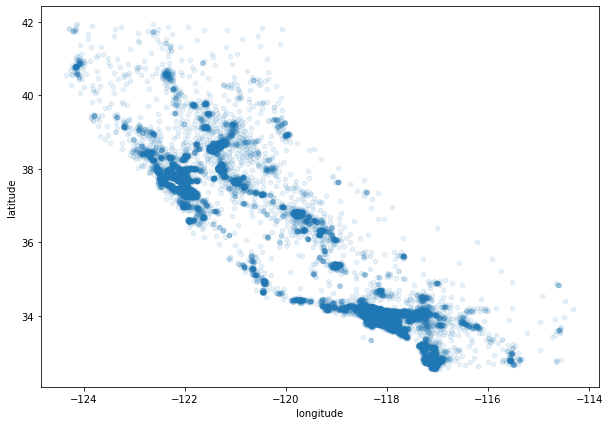

In [11]:
# Agregar alpha=0,1
df.plot(kind='scatter', x='longitude', alpha=0.1, y='latitude', figsize=(10,7))

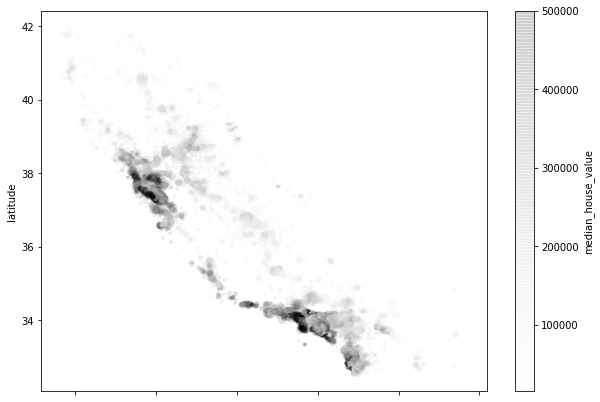

In [12]:
# Cambiar el tamaño del punto y agregar una escala de medición
# s: Tamaño de cada punto
# c: Etiqueta
df.plot(kind='scatter', x='longitude', alpha=0.1, y='latitude', figsize=(10,7),
        s=df['population']/100, c='median_house_value', colorbar=True)

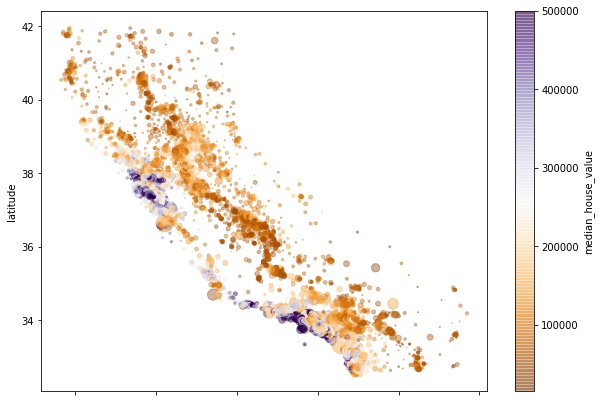

In [13]:
# pip install colorspacious
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
df.plot(kind='scatter', x='longitude', alpha=0.4, y='latitude', figsize=(10,7),
        s=df['population']/100, c='median_house_value', cmap=plt.get_cmap('PuOr'), colorbar=True)

##Mapa de Casas (con Folium)

In [14]:
#pip install folium
import folium
mapa=folium.Map(location=[37.50,-122.2], zoom_start=6)
mapa

In [15]:
# Hacer un arreglo llamado 'distritos_loc0 que contenga sólo la información de las coordenadas
distritos=df[['latitude', 'longitude']].to_numpy()
distritos

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

In [16]:
from folium import plugins
from folium.plugins import HeatMap

HeatMap(distritos, radius=15, max_val=0.1, min_opacity=0.4).add_to(mapa)
mapa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f215b5c2a50>,
      dtype=object)

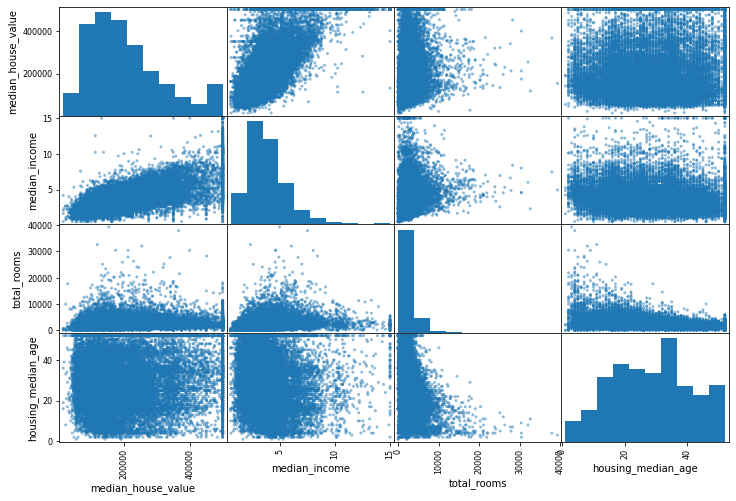

In [17]:
# Hacer diagramas de correlación
#   Definir una lista llamada atributos con las siguientes variables:
#      - median_house_value, median_income, total_rooms, housing_median_age
from pandas.plotting import scatter_matrix

atributos = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(df[atributos], figsize=(12, 8))

In [18]:
# Definir una columna llamada 'bedrooms_per_room' y asignarle el valor de la división de
# la variable total_bedrooms con total_rooms
df['bed_rooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [19]:
atributos = ['median_house_value', 'median_income','bed_rooms_per_room','total_rooms', 'housing_median_age']
df[atributos].head()

,median_house_value,median_income,bed_rooms_per_room,total_rooms,housing_median_age
0,452600.0,8.3252,0.146591,880.0,41.0
1,358500.0,8.3014,0.155797,7099.0,21.0
2,352100.0,7.2574,0.129516,1467.0,52.0
3,341300.0,5.6431,0.184458,1274.0,52.0
4,342200.0,3.8462,0.172096,1627.0,52.0


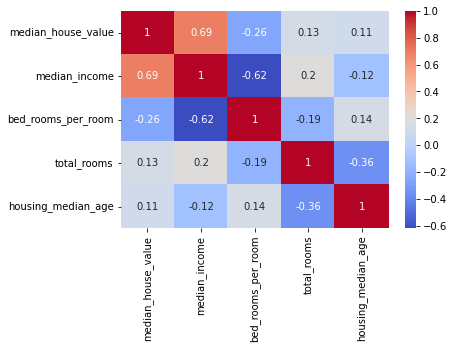

In [20]:
# Matriz de correlación numérica y visual
# https://matplotlib.org/tutorials/colors/colormaps.htmal
# Instalación de seaborn
# pip install seaborn
import seaborn as sn

corrMatrix = df[atributos].corr().round(2)
sn.heatmap( corrMatrix, annot=True, cmap='coolwarm')
plt.show()

## 4. Preparación de los datos y sus transformadores


In [21]:
# Revisar y eliminar datos perdidos NaN
df.isnull().values.any()

True

In [22]:
len(df)

20640

In [23]:
df=df.dropna()
len(df)

20433

## Categorical Values

In [24]:
# Revisar nuevamente la columna 'ocean_proximity'
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [44]:
# Importar la función OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
Nominal_codificador=OneHotEncoder(sparse=False)
Nominal_codificador.fit_transform(df[['ocean_proximity']])

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [45]:
Nominal_codificador.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
## Ejemplo codificación Ordinal
# Importar la función OrdinalEncoder
# ORDINAL sólo como referencia, en este caso se va a usar el NOMINAL de arriba
   # from sklearn.preprocessing import OrdinalEncoder
   # Ordinal_codificador=OrdinalEncoder()
   # Ordinal_codificador.fit_transform(df[['ocean_proximity']])
   # Ordinal_codificador.categories_

In [47]:
# PIPELINE Transformations
# Realiza una serie de transformaciones a los datos en secuencia
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [50]:
# Crear la lista de variables numéricas y categóricas
#    Numéricas: 'median_income', 'total_rooms', 'housing_median_age', 'bed_rooms_per_room'
#    Categóricas: 'ocean_proximity'
numeric_list = ['median_income', 'total_rooms', 'housing_median_age', 'bed_rooms_per_room']
categorical_list = ['ocean_proximity']

In [51]:
# Crear el pipeline de preprocesamiento para datos numéricos y categóricos
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])
categorical_transformer = Pipeline (steps = [ ('onehot', OneHotEncoder())])

###ColumnTransformer

Es una clase de scikit-learn que permite aplicar transformaciones de preparación de datos de forma selectiva.

Por ejemplo, permite aplicar una transformación específica o secuencia de transformaciones solo a las columnas categóricas.

Para usar ColumnTransformer, debe especificar una lista de transofrmadores.

Cada transformador es una tupla de tres elementos de que define el nombre del transofrmador, la transformación a aplicar y los índices de columna a los que aplicar.  Por ejemplo: (Nombre, objeto, columnas)





In [52]:
# Definir los transformadores
transformer = ColumnTransformer ( [
    ('num', numeric_transformer, numeric_list), ('cat', categorical_transformer, categorical_list)
] )

In [53]:
# Tener presente este orden numérico + categórico


In [54]:
# X = matriz de variables de entrada
# Crear X (Quitar la columna resultado 'median_house_value')
X = df.drop('median_house_value', axis=1)
X


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_rooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,0.172096
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,0.219892


In [55]:
y = df['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [57]:
# Revisar el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14303, 10), (6130, 10), (14303,), (6130,))

### Seleccionar modelos y realizar entrenamiento


In [58]:
# Modelo Lineal
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [59]:
# Pipeline de la predicción completa
model_linear_regression = Pipeline([
  ('transformer', transformer), 
  ('linear_regression', linear_regression)
])

In [62]:
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [63]:
# Probamos unas pocas instancias
muestra_datos = X_test.iloc[:4]

model_linear_regression.predict(muestra_datos)

array([190830.53016517, 161787.8738119 , 174191.33902199, 337086.08350367])

In [64]:
list(y_test.iloc[:4])

[144800.0, 84000.0, 140500.0, 500000.0]

# Linear Regression

In [69]:
# Evaluar el modelo usando Cross Validation
from sklearn.model_selection import cross_val_score

# Como medición del modelo utilizamos el Error de Mínimos Cuadrados
linear_scores = cross_val_score( model_linear_regression, X, y, 
                                scoring='neg_mean_squared_error', cv=10)
linear_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: se

array([-7.63785252e+09, -3.62418375e+09, -8.40418295e+09, -4.95102684e+09,
                   nan, -4.95045904e+09, -3.01902699e+09, -8.62342684e+09,
       -6.94905665e+09, -3.02338463e+09])

In [70]:
# Cambiar el signo y sacar la raíz
linear_rmse_scores = np.sqrt(-linear_scores)

In [80]:
# Definir una función que devuelva el score, media y desv std
def display_scores(scores):
  print('Scores:             ', scores)
  print('Mean:               ', scores.mean())
  print('Standard Deviation: ', scores.std())

In [72]:
display_scores(linear_rmse_scores)

Scores:              [87394.80828634 60201.19395636 91674.33089871 70363.5334771
            nan 70359.49855267 54945.67304355 92862.40810597
 83361.00198491 54985.31282018]
Mean:                nan
Standard Deviation:  nan


# Decision Tree

In [76]:
# Aplicar el modelo de árboles de decisión con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# 1. Nombrar una variable para nuestro modelo
tree_reg = DecisionTreeRegressor(random_state=42)

# 2. Definir el Pipeline: Transformación + Modelo
model_tree_reg = Pipeline(steps= [
    ('transformer', transformer), 
    ('tree_reg', tree_reg), 
    
])
# 3. Ajustar el modelo
model_tree_reg.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('tree_reg', DecisionTreeRegressor(random_state=42))])

In [77]:
# Evaluación
# 4. Calcular el score con la validación cruzada CV=10
tree_reg_scores = cross_val_score( model_tree_reg, X, y, 
                                  scoring='neg_mean_squared_error', cv=10)
# 5. Realizar el cambio e signo y sacar la raíz
tree_rmse_scores = np.sqrt(-tree_reg_scores)
# 6. Mostrar el resultado usando la función display_scores
display_scores(tree_rmse_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: se

Scores:              [105556.93810156  78112.22041964 115878.51248801 103011.53477862
             nan  92373.99335328  73240.93261149 108583.36581058
 106916.93011481  78043.6836567 ]
Mean:                nan
Standard Deviation:  nan


# Random Forest

In [85]:
# Aplicar el modelo de RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [87]:
#1. Nombrar una variable para nuestro modelo
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

In [88]:
#2. Definir el Pieline: Transformación + Modelo
model_forest_reg = Pipeline (steps=[
    ('transformer', transformer), 
    ('forest_reg', forest_reg), 
    
])

In [89]:
#3. Ajustar el modelo
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [90]:
# Evaluación
# 4. Calcular el score con la validación cruzada CV=10
forest_reg_scores = cross_val_score( model_forest_reg, X, y, 
                                  scoring='neg_mean_squared_error', cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: se

In [91]:

# 5. Realizar el cambio e signo y sacar la raíz
forest_rmse_scores = np.sqrt(-forest_reg_scores)


In [92]:
# 6. Mostrar el resultado usando la función display_scores
display_scores(forest_rmse_scores)

Scores:              [82638.01182566 59337.87089266 88489.39032236 78197.53011025
            nan 72230.77301801 54677.71551589 87524.40024207
 84602.44891337 59462.52352089]
Mean:                nan
Standard Deviation:  nan


# Resumen

In [94]:
list_model = ['Linear Regression', 'Decision Tree', 'Random Forest']
list_mean  = [75124, 96237, 74244]
list_sd = [14137, 14595, 11687]

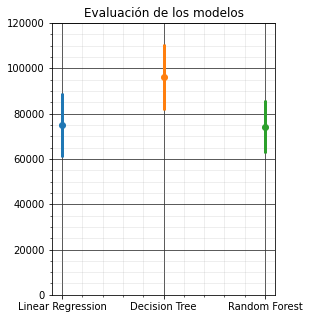

In [98]:
plt.figure(figsize=(4,5))
for i in range(3):
  plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)
plt.xticks( [0, 1, 2], list_model)
plt.title('Evaluación de los modelos')
plt.ylim(0,120000)
plt.grid(b=True, which='major', color='#333333', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

### Afinación (fine tune) del modelo Random Forest (que fue el mejor de la fase anterior

In [100]:
# Utilizar la función GridSearchCV para encontrar los valores óptimos
from sklearn.model_selection import GridSearchCV

In [103]:
# Definición de posibles parámetros
n_estimators = [3, 10, 30, 50, 80, 100]
min_samples_split = [2,4,6,8]
max_depth = [2, 4, 6, 8, 10]

params = {'forest_reg__n_estimators': n_estimators,
          'forest_reg__min_samples_split':min_samples_split,
          'forest_reg__max_depth':max_depth}
print(params)

{'forest_reg__n_estimators': [3, 10, 30, 50, 80, 100], 'forest_reg__min_samples_split': [2, 4, 6, 8], 'forest_reg__max_depth': [2, 4, 6, 8, 10]}


In [108]:
# Definición del grid de búsqueda
grid = GridSearchCV( model_forest_reg, param_grid=params,
                    cv=10, scoring='neg_mean_squared_error', 
                    n_jobs=-1, verbose=3)

In [ ]:
# Ajuste del modelo usando todas las posibles combinaciones de parámetros
grid.fit(X,y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [ ]:
grid.best_params_

In [ ]:
#1. Ajustar el modelo con los nuevos parámetros
forest_reg=RandomForestRegressor(random_state=42,
                                 max_depth=10,
                                 min_samples_split=8,
                                 n_estimators=100)

In [ ]:
model_forest_reg = Pipeline(steps=[
    ('transformer', transformer),
    ('forest_reg', forest_reg)
])

In [ ]:
# Ajustar el modelo
model_forest_reg.fit(X_train, y_train)

In [ ]:
# Evaluación
# 4. Calcular el score con la validación cruzada CV=10
forest_reg_scores = cross_val_score( model_forest_reg, X, y, 
                                  scoring='neg_mean_squared_error', cv=10)

In [ ]:
# 5. Realizar el cambio e signo y sacar la raíz
forest_rmse_scores = np.sqrt(-forest_reg_scores)

In [ ]:
# 6. Mostrar el resultado usando la función display_scores
display_scores(forest_rmse_scores)